<a href="https://colab.research.google.com/github/francisfernande/projects/blob/main/DIabetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
df = pd.read_csv(r'diabetes.csv')

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#no null value but there can value == 0
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<ipython-input-7-f5e4c62d6ee0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

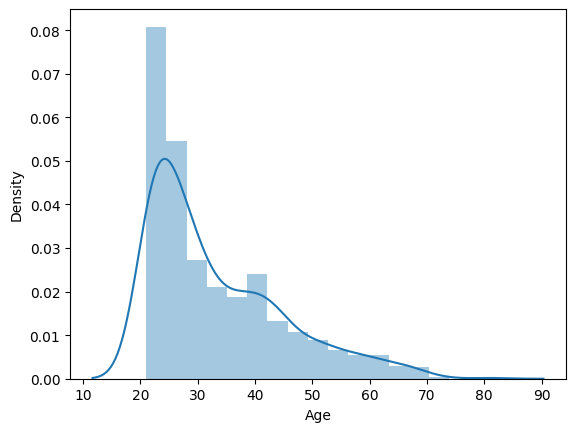

In [7]:
sb.distplot(df["Age"])

In [8]:
for i in df.columns:
  count = (df[i] == 0).sum()
  print(i, count)

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [9]:
#calculate BMI of person

#height / weight

#if bmi == 0 (Not Poss)
#so all 0 value of bmi can be mean

**The 0's in the**

Glucose, BMI, Blood Pressure columns need to be replaced


In [10]:
dfc = df

In [11]:
dfc["BMI"].replace(to_replace = 0,value = dfc["BMI"].mean(),inplace = True)

In [12]:
dfc["Glucose"].replace(to_replace = 0,value = dfc["Glucose"].mean(),inplace = True)

In [13]:
dfc["BloodPressure"].replace(to_replace = 0,value = dfc["BloodPressure"].mean(),inplace = True)


In [14]:
dfc["Insulin"].replace(to_replace = 0, value = dfc["Insulin"].mean(), inplace = True)

In [15]:
for i in df.columns:
  count = (df[i] == 0).sum()
  print(i, count)

Pregnancies 111
Glucose 0
BloodPressure 0
SkinThickness 227
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [16]:
dfc.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,-0.081672,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.074934,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.020924,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,-0.081672,0.074934,0.020924,1.000000,0.304189,0.381755,0.183928,-0.113970,0.074752
Insulin,-0.018082,0.396597,0.010926,0.304189,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.381755,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.183928,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,-0.113970,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.074752,0.179185,0.312254,0.173844,0.238356,1.000000


In [17]:
dfc.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ipython-input-18-04bc4cabbf85>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data=dfc,shade = True,color = "r")


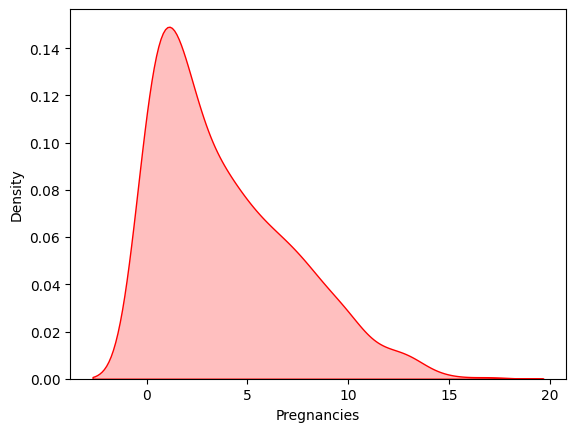

<ipython-input-18-04bc4cabbf85>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data=dfc,shade = True,color = "r")


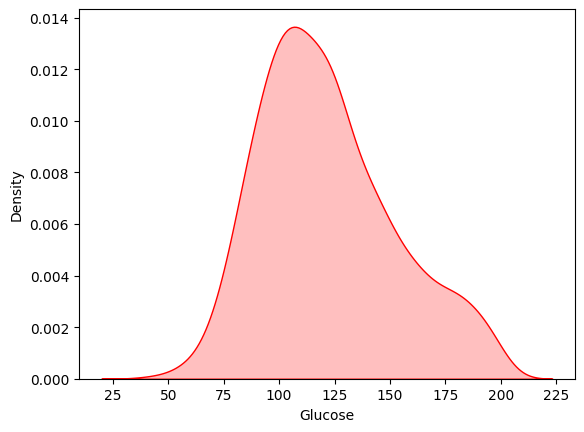

<ipython-input-18-04bc4cabbf85>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data=dfc,shade = True,color = "r")


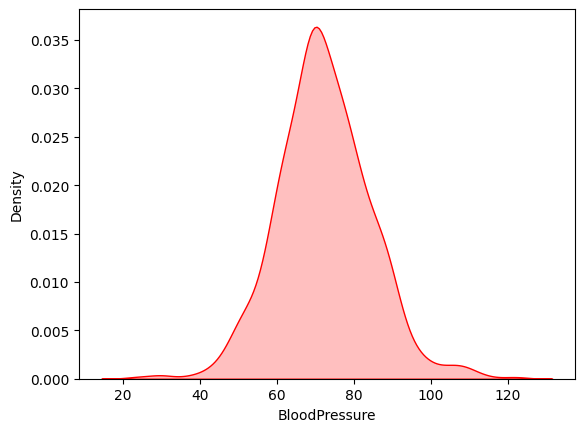

<ipython-input-18-04bc4cabbf85>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data=dfc,shade = True,color = "r")


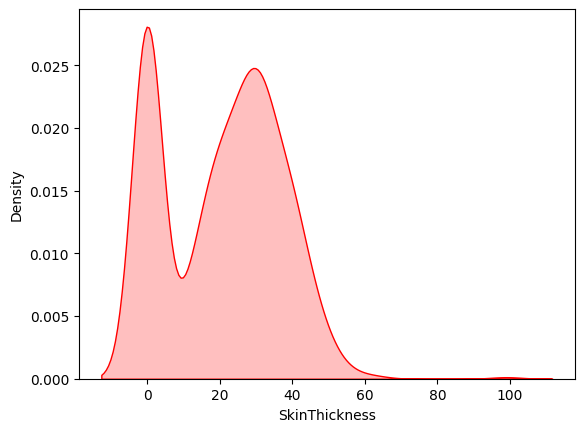

<ipython-input-18-04bc4cabbf85>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data=dfc,shade = True,color = "r")


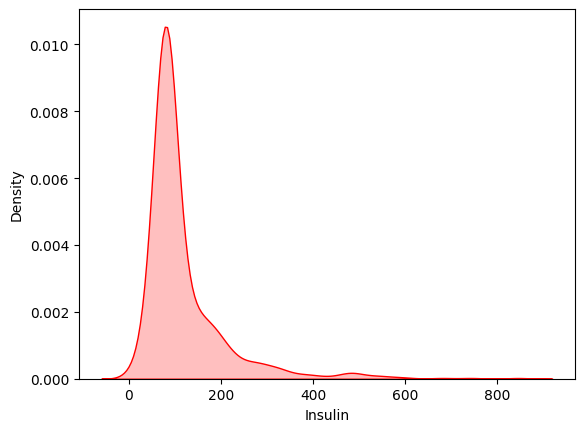

<ipython-input-18-04bc4cabbf85>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data=dfc,shade = True,color = "r")


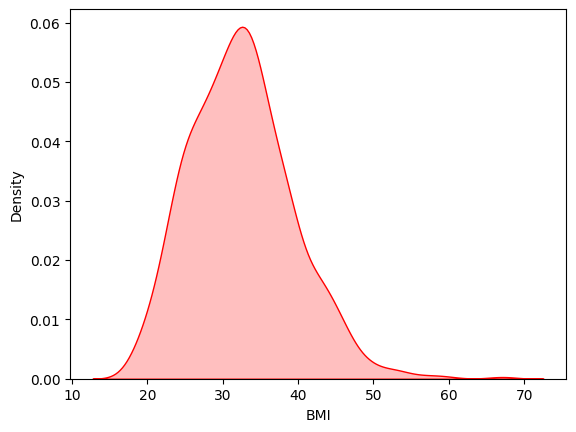

<ipython-input-18-04bc4cabbf85>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data=dfc,shade = True,color = "r")


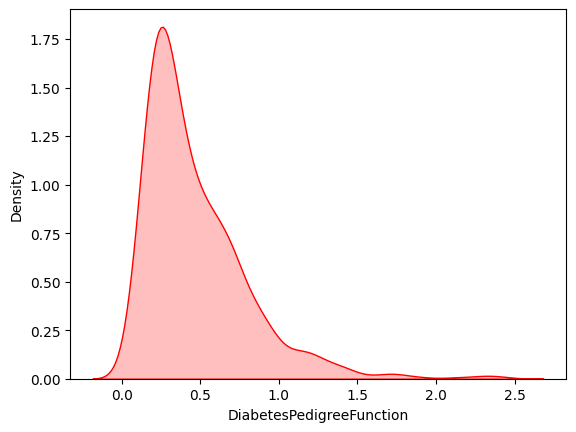

<ipython-input-18-04bc4cabbf85>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data=dfc,shade = True,color = "r")


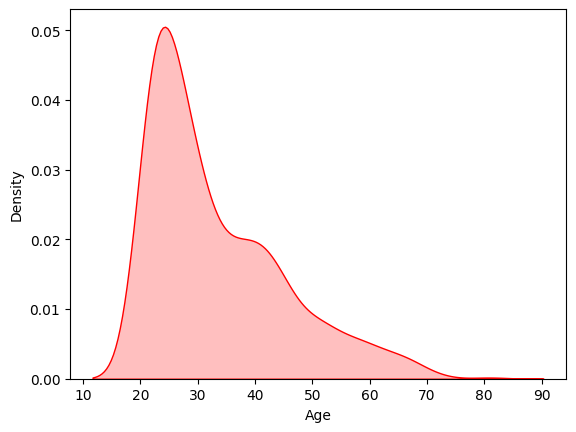

<ipython-input-18-04bc4cabbf85>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(x=col, data=dfc,shade = True,color = "r")


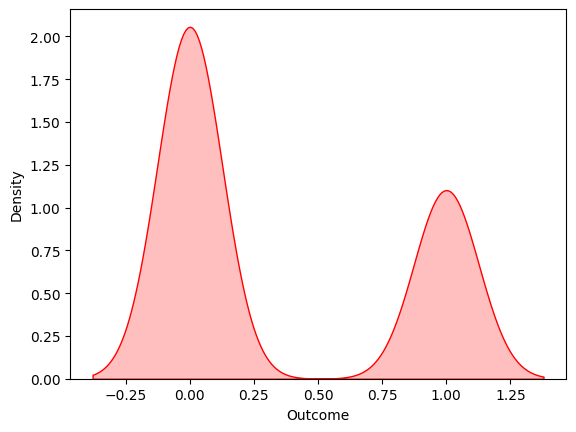

In [18]:

for i, col in enumerate(dfc.columns):
    plt.figure(i)
    sb.kdeplot(x=col, data=dfc,shade = True,color = "r")
    plt.show()

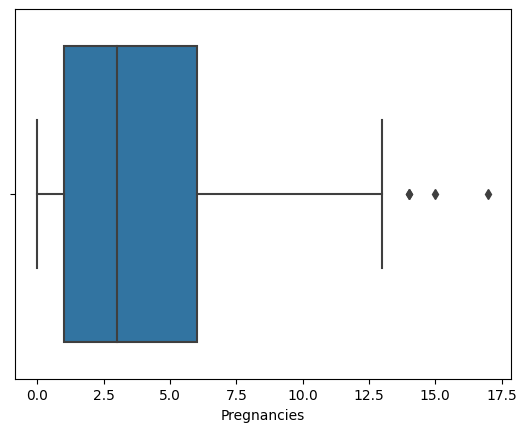

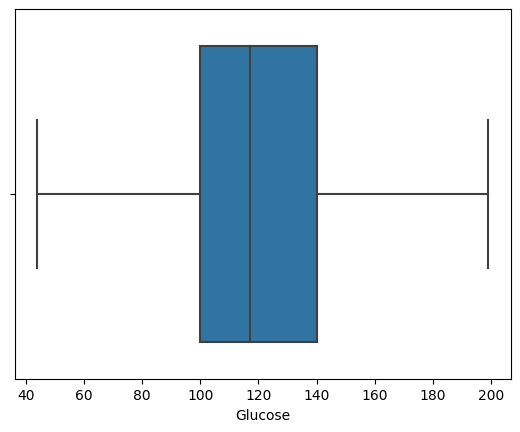

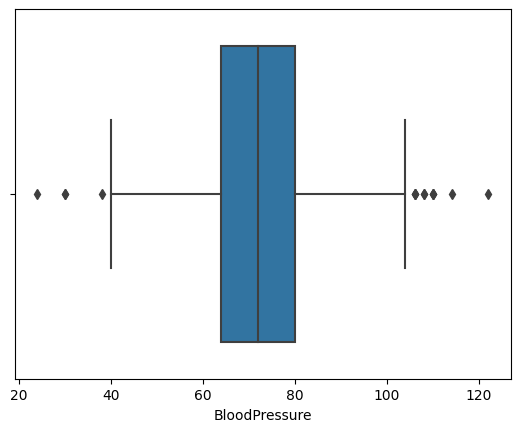

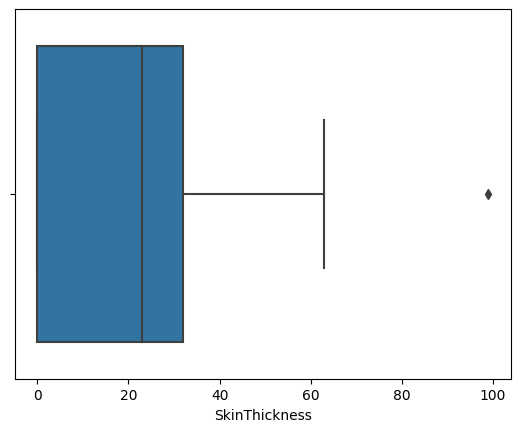

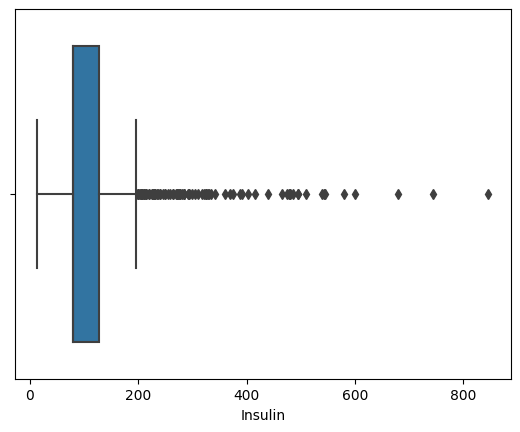

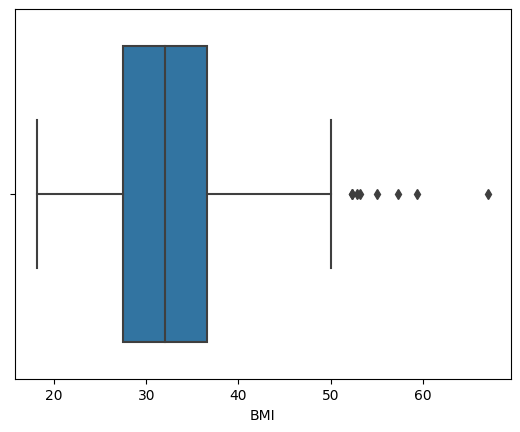

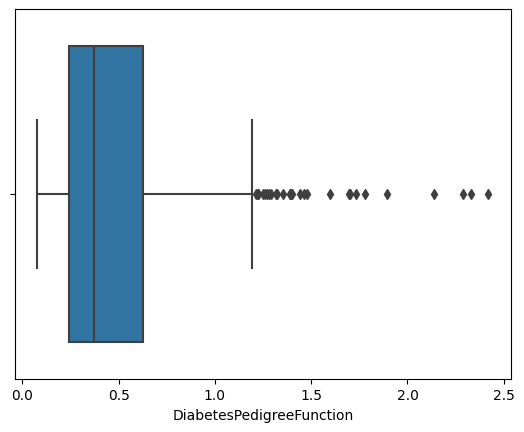

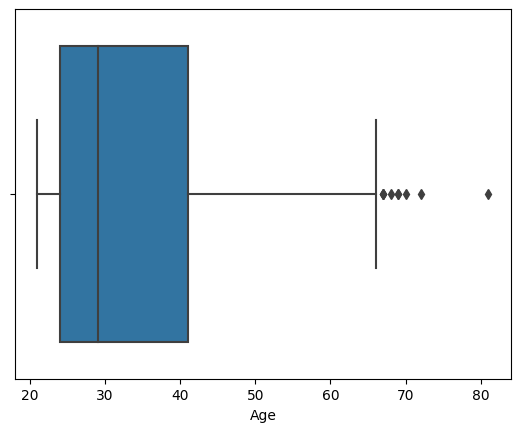

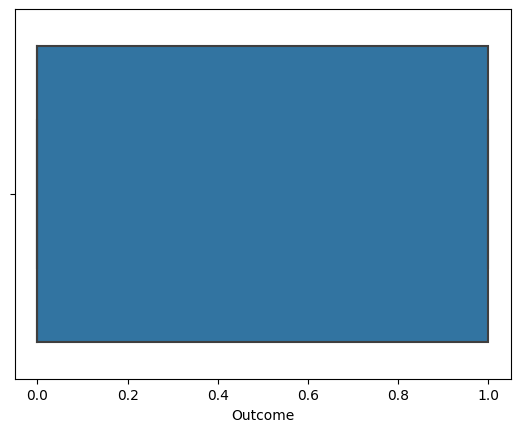

In [19]:
#check again for outliers in box plot
for i, col in enumerate(dfc.columns):
    plt.figure(i)
    sb.boxplot(x=dfc[col])
    plt.show()

<Axes: >

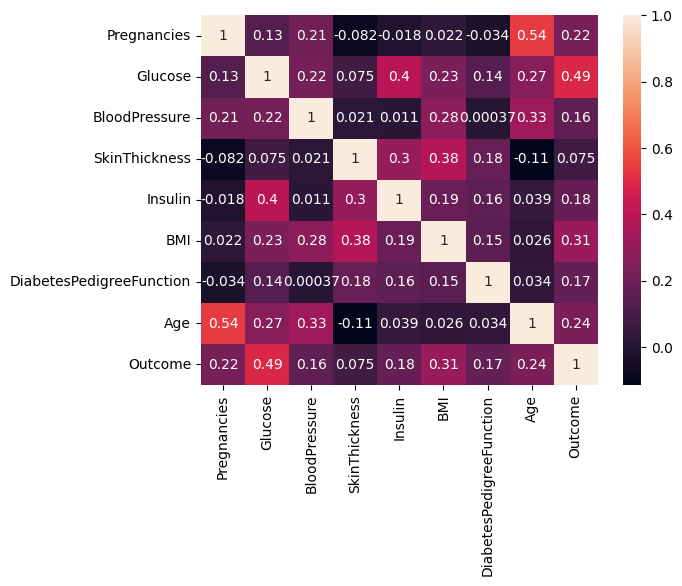

In [21]:
sb.heatmap(dfc.corr(),annot =True)

In [28]:
#we are removing the top 2% data from the preg columns
df['Pregnancies'].quantile(0.98)
q = df['Pregnancies'].quantile(0.98)


In [29]:
df_cleaned = df[df['Pregnancies']<q]

In [32]:
q = df['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
df_cleaned  = df_cleaned[df_cleaned['BMI']<q]
q = df['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
df_cleaned  = df_cleaned[df_cleaned['SkinThickness']<q]
q = df['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
df_cleaned  = df_cleaned[df_cleaned['Insulin']<q]
q = df['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
df_cleaned  = df_cleaned[df_cleaned['DiabetesPedigreeFunction']<q]
q = df['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
df_cleaned  = df_cleaned[df_cleaned['Age']<q]

<ipython-input-36-2985a1b2ac83>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_cleaned[column])
<ipython-input-36-2985a1b2ac83>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df_cleaned[column])
<ipython-input-36-2985a1b2ac83>:8: UserWarning: 

`distplot` is a deprecated function and will b

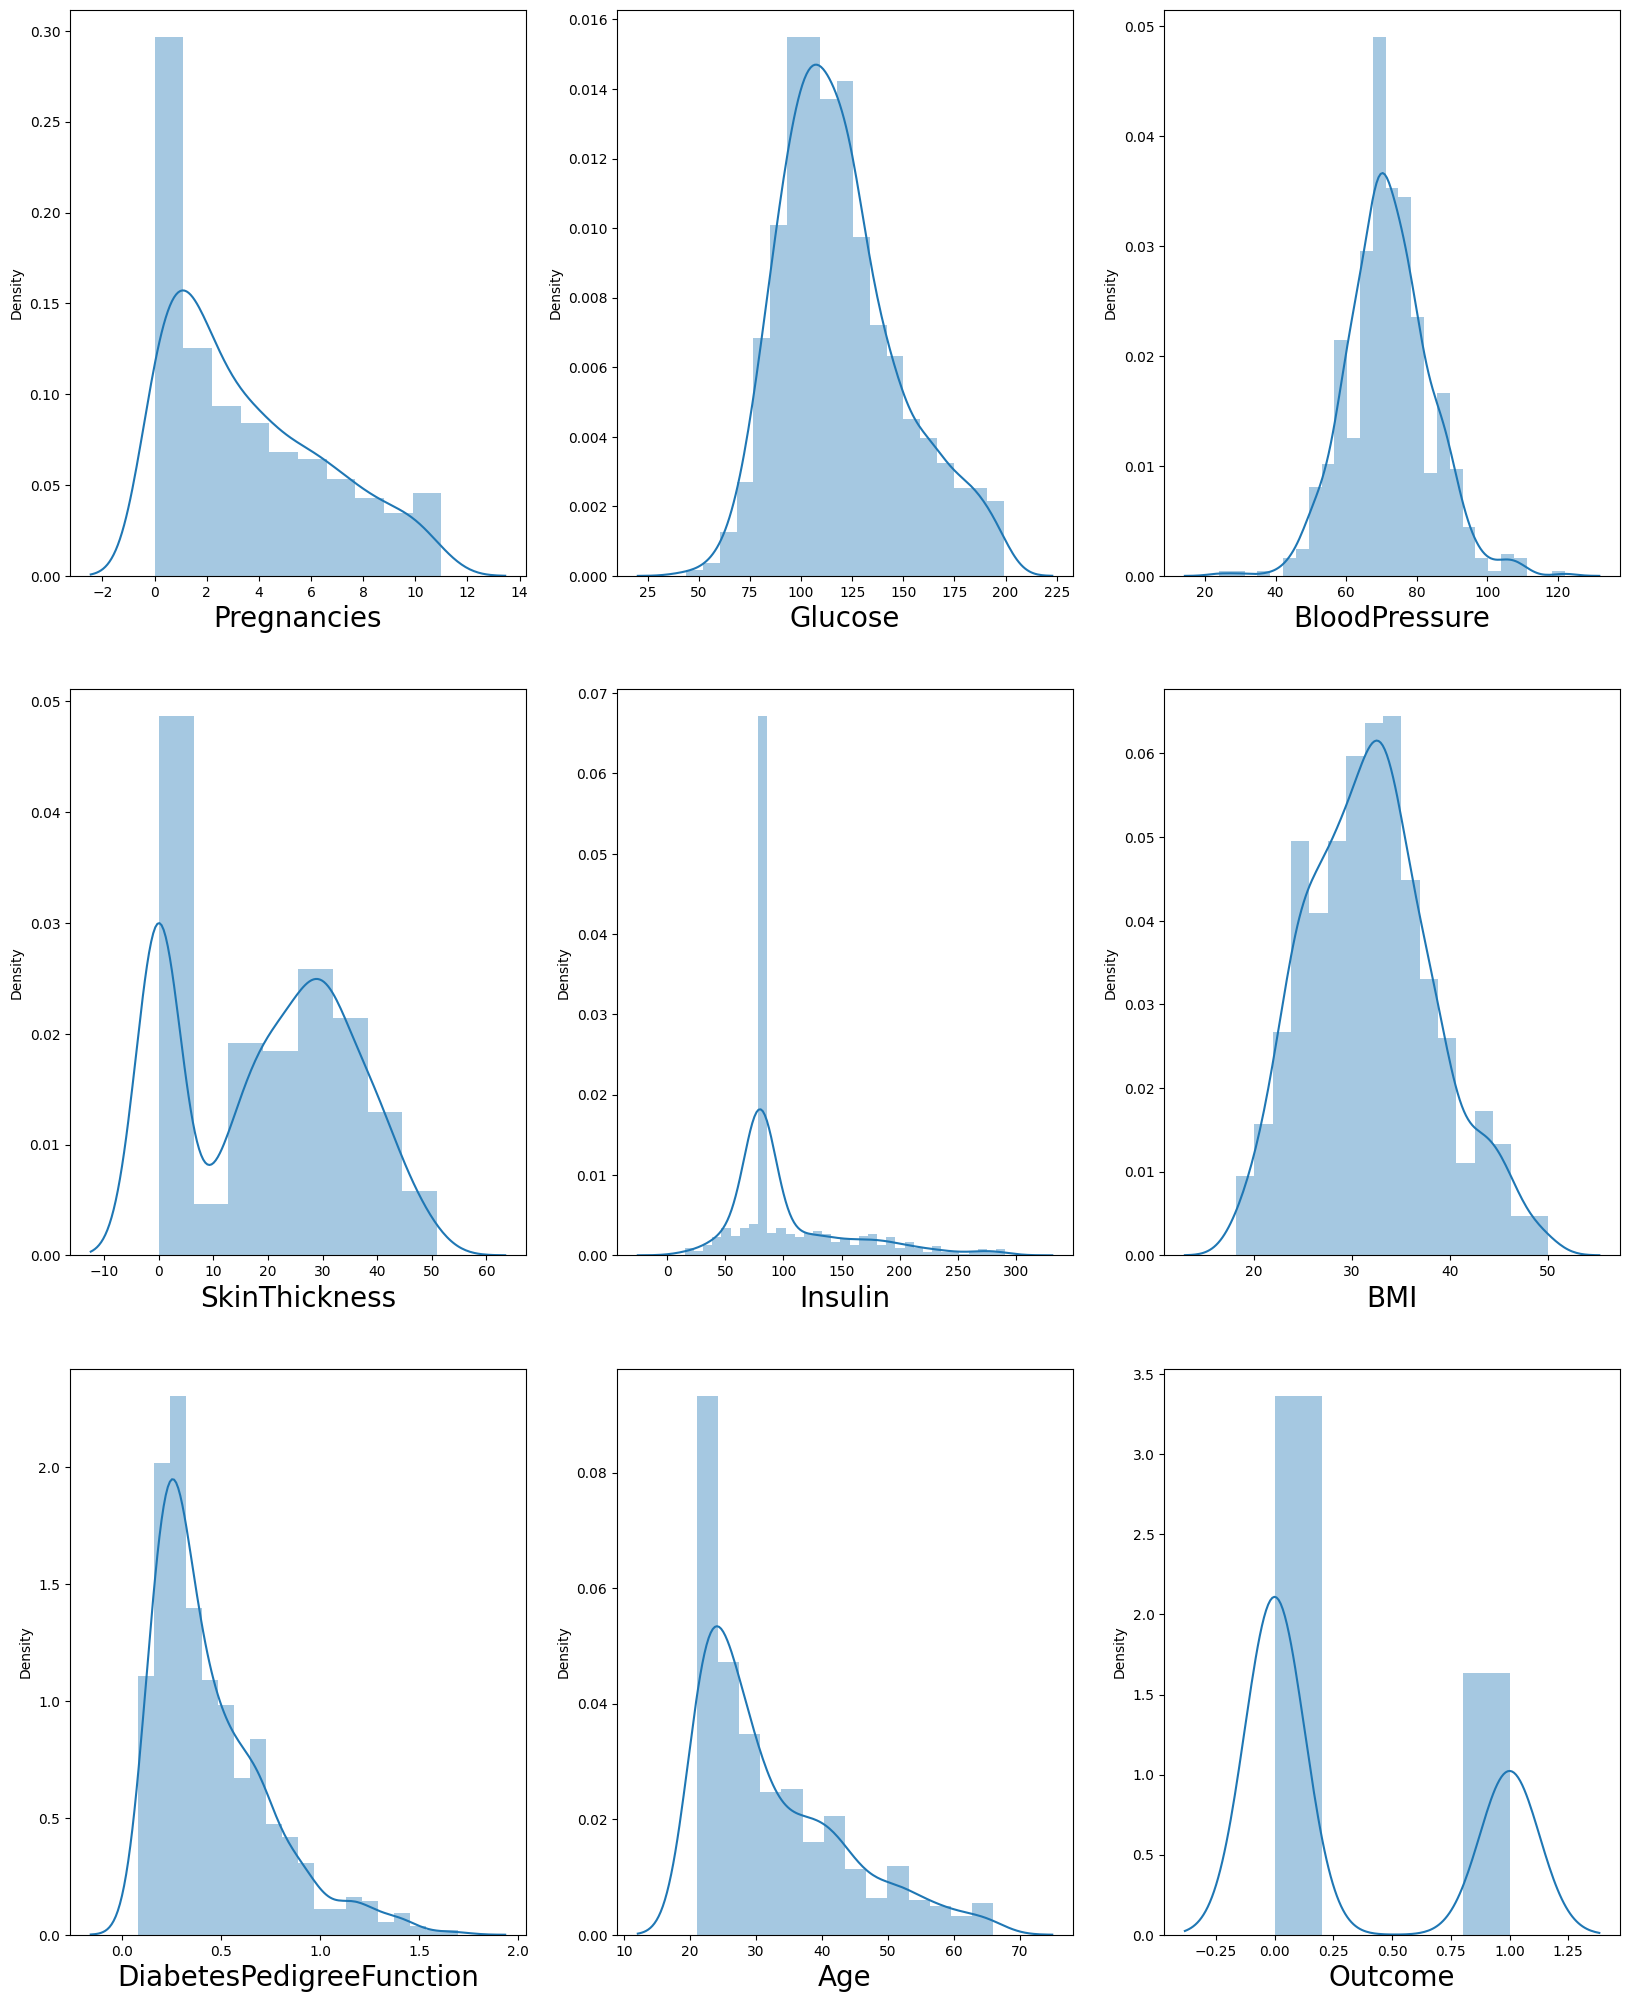

In [36]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sb.distplot(df_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

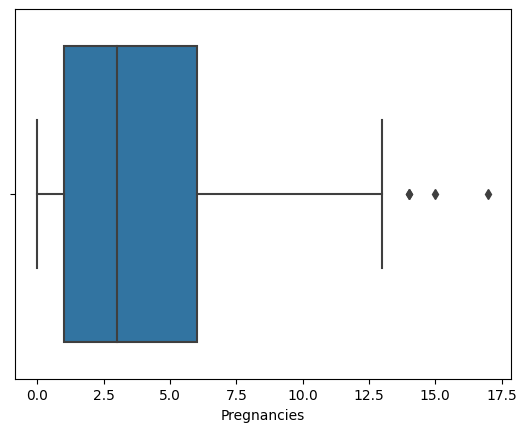

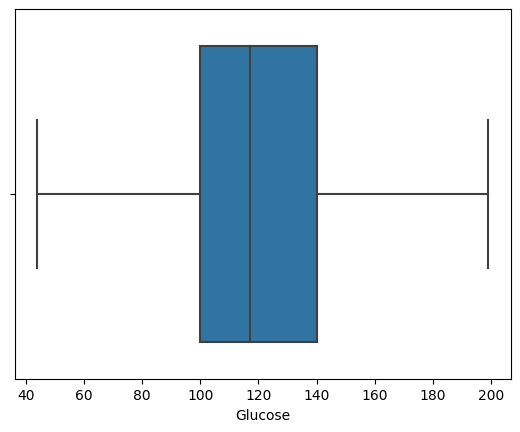

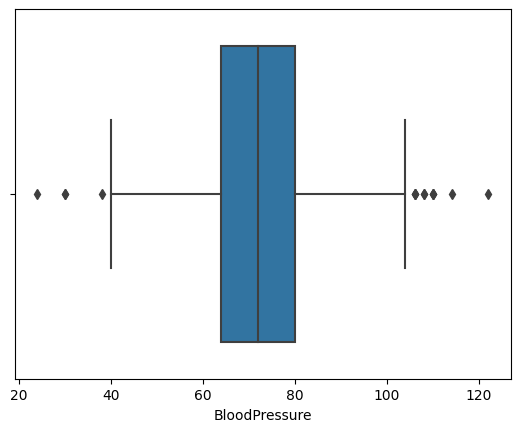

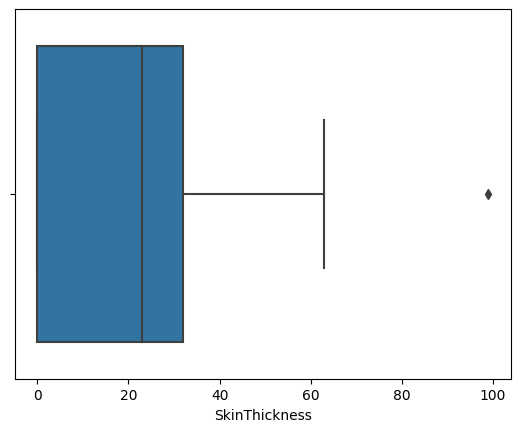

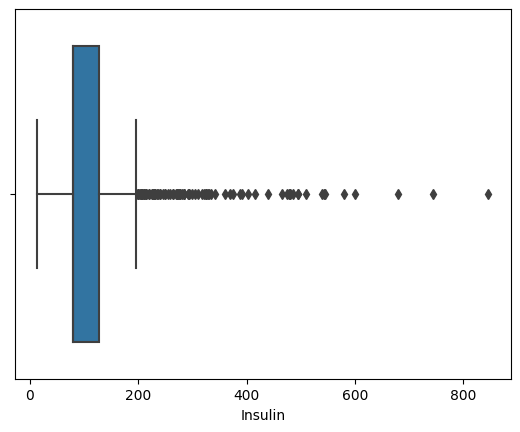

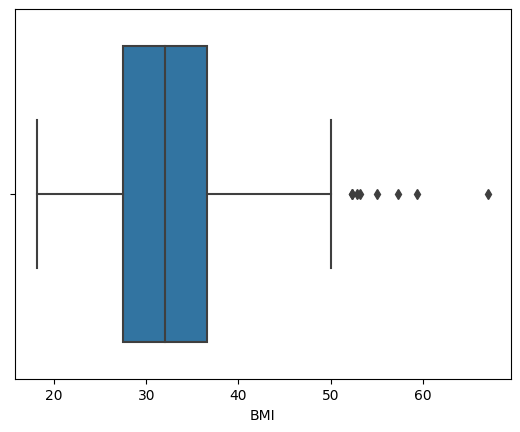

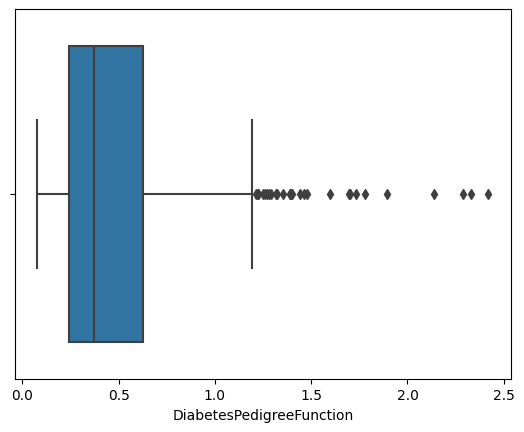

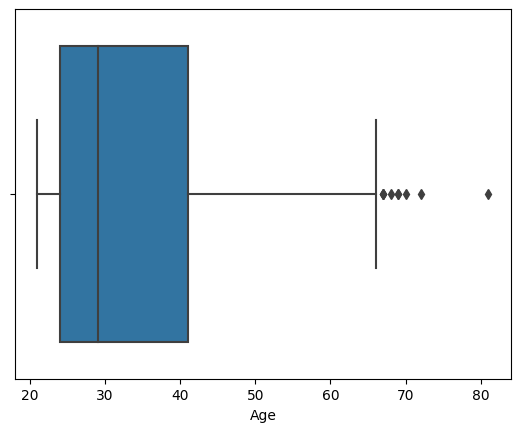

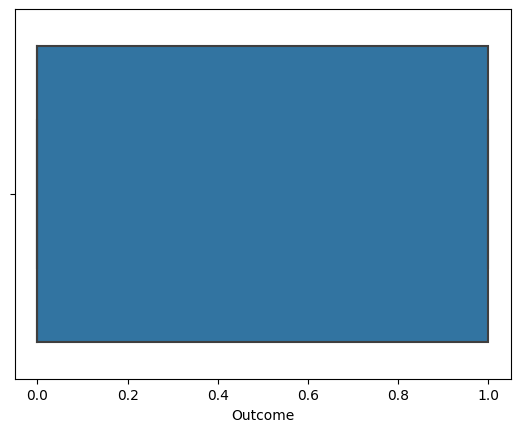

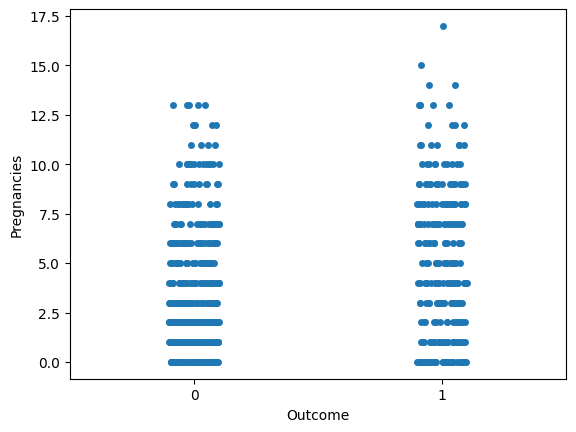

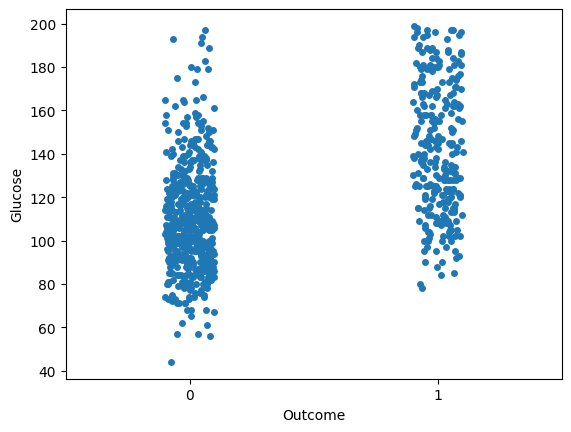

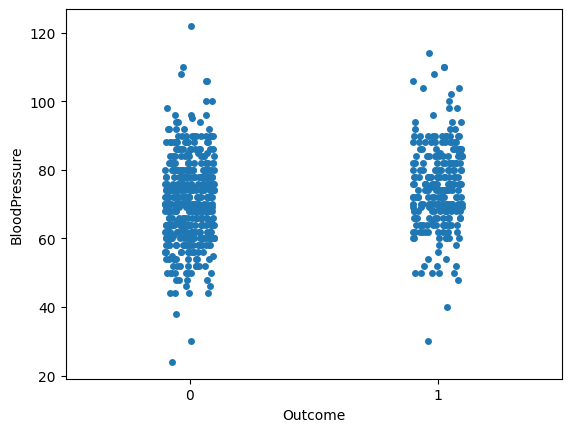

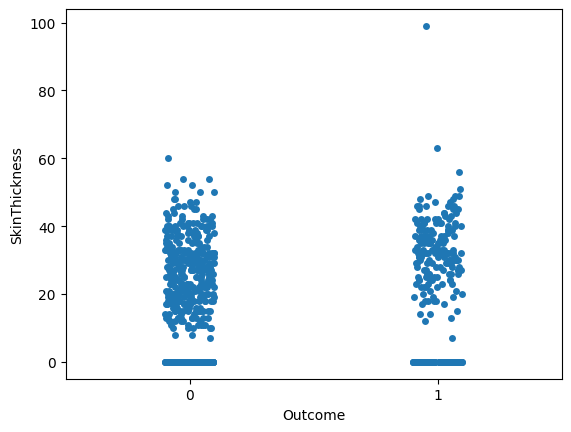

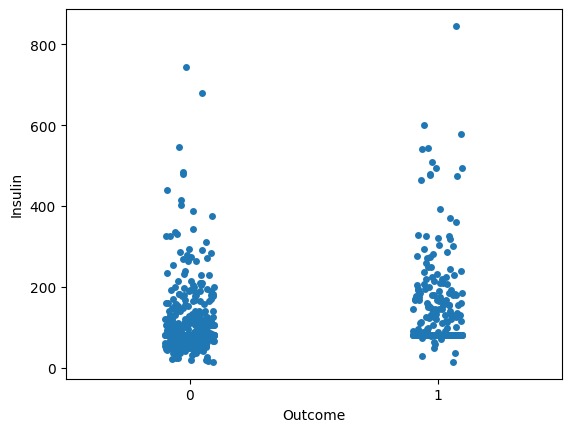

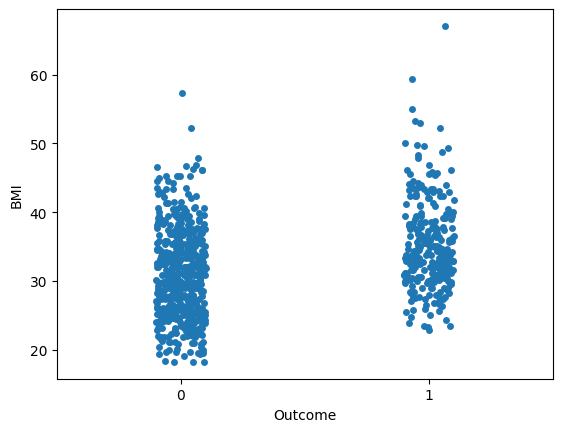

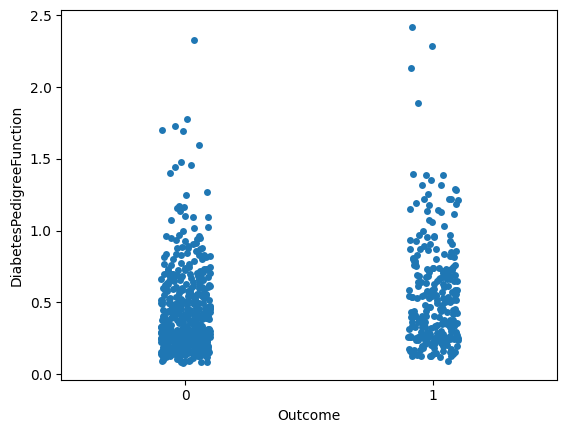

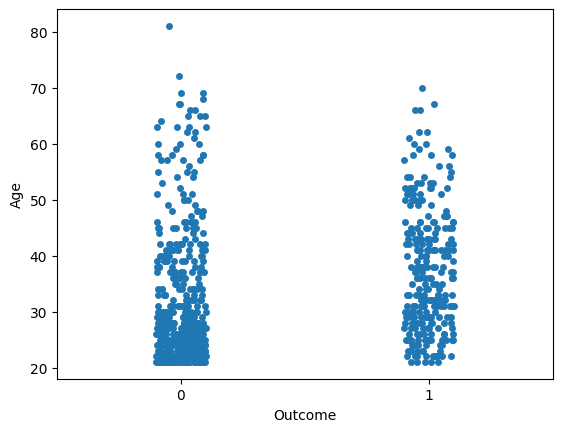

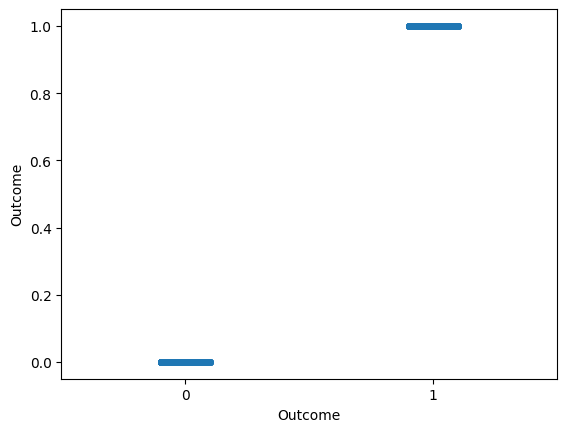

In [37]:
for i, col in enumerate(dfc.columns):
    plt.figure(i)
    sb.stripplot(x=dfc["Outcome"],y = dfc[col])
    plt.show()

In [41]:
X = dfc.iloc[: ,:-1]
y = dfc.iloc[:,-1]

In [42]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,79.799479,33.6,0.627,50
1,1,85.0,66.0,29,79.799479,26.6,0.351,31
2,8,183.0,64.0,0,79.799479,23.3,0.672,32
3,1,89.0,66.0,23,94.000000,28.1,0.167,21
4,0,137.0,40.0,35,168.000000,43.1,2.288,33


In [40]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [45]:
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [46]:
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 10)

In [48]:
x_train

array([[ 0.04601433,  1.62145188, -0.0210444 , ...,  1.62266974,
         0.02151441, -0.61611067],
       [ 0.63994726, -0.44981318, -2.33355721, ..., -1.22994225,
         1.03023405,  0.14967911],
       [ 0.93691372,  2.44338246,  1.46557097, ...,  1.06961231,
        -0.06304891,  0.66020563],
       ...,
       [-0.25095213, -0.1867954 ,  0.14413508, ..., -0.89519697,
        -1.10196973, -0.78628618],
       [-0.84488505, -1.10735764, -3.48981362, ...,  3.28184202,
         0.07285643, -0.61611067],
       [ 0.3429808 , -0.84433986,  0.14413508, ...,  0.16725546,
         1.58593589,  0.83038113]])

In [49]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [50]:
logr.fit(x_train,y_train)

LogisticRegression()

In [51]:
#saving or pickling our model
import pickle

#writing diff model files to file
with open("modelforpred.sav","wb") as f:
  pickle.dump(logr,f)

with open("standardscaler.sav","wb") as f:
  pickle.dump(sc,f)

In [52]:
y_pred = logr.predict(x_test)

In [53]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [54]:
logr.score(x_train,y_train)

0.7795138888888888

In [55]:
#confussion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[108,  13],
       [ 37,  34]])

In [62]:
true_positive = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_negative = cm[1][1]

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7395833333333334

In [63]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7395833333333334

In [57]:

from sklearn.metrics import precision_score
precision = precision_score(y_test,y_pred)
precision

0.723404255319149

In [64]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.8925619834710744

In [58]:
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred)
recall

0.4788732394366197

In [59]:
f_score = 2*(recall * precision) / (recall + precision)
f_score

0.576271186440678